
# Project: Investigating a No-show appointments Dataset
## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 The original data set can be found here : https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv.

<a id='intro'></a>
## Introduction

In this project,we'll be analyzing data associated with appointments of the patients. In particular, we'll be intrested in finding trends whether the information from 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up for their appointment and how the data differs.


In [4]:
# import statements for all of the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

In [5]:
# Loading the data. 
df = pd.read_csv('noshowappointments.csv')
#Perform operations to inspect data

df.shape # to return tuple and dimensions of the dataframe

(110527, 14)

In [6]:
df.head() #to understand basic structure of data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.describe() #to analyse descriptive statistics for each column of data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#to check whether there are any null values in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning 
Considering all the columns for data analysis , till date the analysed information tells us that:

1)There 14 columns in total out of which 13 are independent variables and 1 is dependent variable (No-show column).
2)The data set also does not contain any missing values(nan).
3)The column names have spelling mistakes which needs to be corrected.
4)The PatientId column should be integer value but it is in float.


In [9]:
#to rename and correct the spelling mistake of the column names
df.rename(columns = {'No-show':'Noshow'},inplace = True)
df.rename(columns = {'Hipertension':'Hypertension'},inplace = True)
df.rename(columns = {'Handcap':'Handicap'},inplace = True)

In [10]:
# to check how many PatientId are not integers
non_int_PatientId = df[~ df.PatientId.apply(lambda x: x.is_integer())]
print('There are {} PatientId that are not integers'.format(len(non_int_PatientId)))
non_int_PatientId

There are 5 PatientId that are not integers


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


As there are only 5 PatientId in Float. We will covert those PatientId to integer.

In [11]:
# to convert PatientId from float to int
df['PatientId'] = df['PatientId'].astype('int64')

In [12]:
#to check whether the changes are done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [13]:
df.info() #to check whether the previous change has been done or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


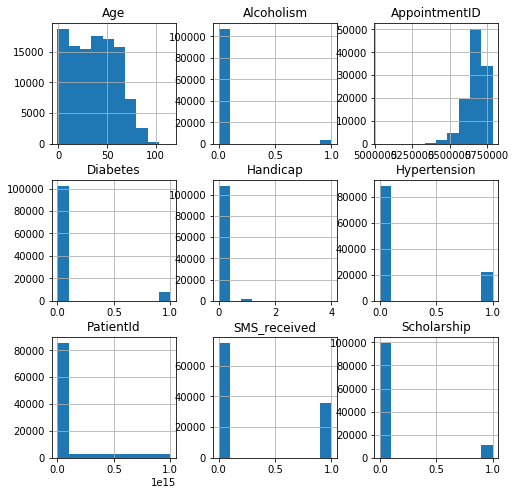

In [15]:
df.hist(figsize=(8,8));

From obervation the above histograms,
1)Age: There are majority of young people in the dataset but in general the patients age is distributed evenly and the number of patients age vary from below 18 to above 55 years.
2)Alcoholism: Most of the patients are non alcoholics.
3)Diabetes: Most of the patients are not diabetic but are more compared to alcoholics.
4)Handicap: There are four handicap categories with less number of people handicapped.
5)Hypertension: There are less number of patients diagonsed with hypertension.
6)SMS_received : 75% of patient received sms.   

In [16]:
# to print unique Values
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))

Unique Values in `Gender` => ['F' 'M']


In [17]:
# Print unique Values
print("Unique Values in `ScheduledDay` => {}".format(df.ScheduledDay.unique()))

Unique Values in `ScheduledDay` => ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...,
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']


In [18]:
# Print unique Values
print("Unique Values in `AppointmentDay` => {}".format(df.AppointmentDay.unique()))

Unique Values in `AppointmentDay` => ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']


In [19]:
# Print unique Values
print("Unique Values in `Noshow` => {}".format(df.Noshow.unique()))

Unique Values in `Noshow` => ['No' 'Yes']


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 : How many Patients are there of each age?


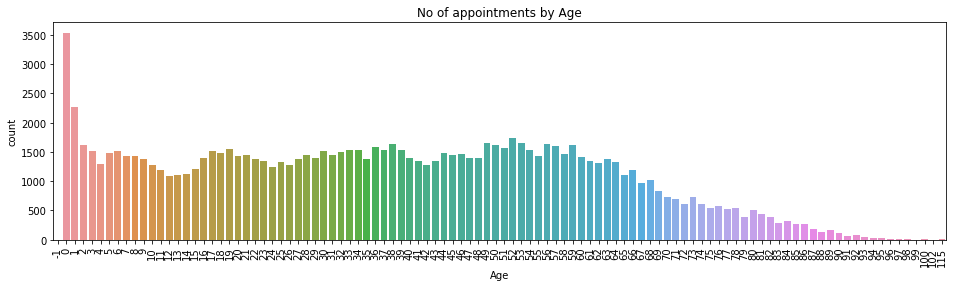

In [30]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of appointments by Age")
plt.show()

The above histogram shows a peak for the patients of age 0. For higher age values the distribution starts to be more uniformed.
After the age 60 we see a right-skewed distribution.

### Question 2 : How many percent of Patients showed up at there appointment?

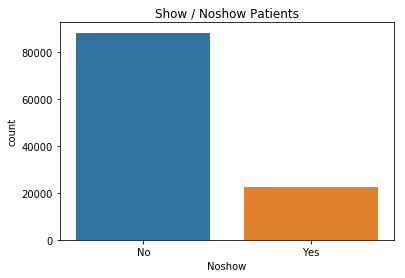

20% of appointments were missed.


In [32]:
allappointments = df.shape[0]
missedappointments = len(df.query('Noshow == \'Yes\''))
missedratio = int(round(missedappointments/allappointments*100))

ax = sns.countplot(x=df.Noshow, data=df)
ax.set_title("Show / Noshow Patients")
plt.show();

print('{}% of appointments were missed.'.format(missedratio))

We can see about 80 percent of patients showed up while 20 percent of patients missed there appointments.(it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they didn't show up)

### Question 3 :How many patients are having more than one appointment? If yes, what are the top 20 patients with most appointments?

In [46]:
df.PatientId.value_counts().iloc[0:20]

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
75797461494159     62
258424392677       62
871374938638855    62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
14479974122994     46
65433599726992     46
81894521843749     42
9452745294842      42
188232341789524    40
2271579924275      38
9496196639835      38
Name: PatientId, dtype: int64

There are patients with multiple appointments. The number of appointments of top 20 patients range from 88 to 38. So considering patient's visit in the hospital, there could be multiple appointments scheduled for one's. One of the Noshow reasons could be that,
1)The patients could be too tired to take part in all examinations during a particular visit or the appointed clinics are unable to conduct them altogether.
2)The open hours were not sufficient to get all the test's done. There could be also other reasons. 

### Question 4 : Is handicap the reason, due to which patients are unable to attend there appointment?

In [47]:
#to check whether handicap is the reason responsible for Noshow
df.groupby(['Handicap','Noshow']).count()

PatientId  AppointmentID  Gender  ScheduledDay  \
Handicap Noshow                                                   
0        No          86374          86374   86374         86374   
         Yes         21912          21912   21912         21912   
1        No           1676           1676    1676          1676   
         Yes           366            366     366           366   
2        No            146            146     146           146   
         Yes            37             37      37            37   
3        No             10             10      10            10   
         Yes             3              3       3             3   
4        No              2              2       2             2   
         Yes             1              1       1             1   

                 AppointmentDay    Age  Neighbourhood  Scholarship  \
Handicap Noshow                                                      
0        No               86374  86374          86374        86374   
         Yes              21912  21912          21912        21912   
1        No                1676   1676           1676         1676   
         Yes                366    366            366          366   
2        No                 146    146            146          146   
         Yes                 37     37             37           37   
3        No                  10     10             10           10   
         Yes                  3      3              3            3   
4        No                   2      2              2            2   
         Yes                  1      1              1            1   

                 Hypertension  Diabetes  Alcoholism  SMS_received  
Handicap Noshow                                                    
0        No             86374     86374       86374         86374  
         Yes            21912     21912       21912         21912  
1        No              1676      1676        1676          1676  
         Yes              366       366         366           366  
2        No               146       146         146           146  
         Yes               37        37          37            37  
3        No                10        10          10            10  
         Yes                3         3           3             3  
4        No                 2         2           2             2  
         Yes                1         1           1             1

Handicap doesn't have a relation with Noshow and most of the patient who showed up are not Handicap.

### Question 5 : Which location has the highest appointments with No show?

In [50]:
highest_place =df['Neighbourhood'].value_counts()
highest_place

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

JARIM CAMBURI is the location that has highest appointments in No show.

<a id='conclusions'></a>
## Conclusions

I have looked into the dataset and managed a few problems like renaming names,converting data, analysing what factors are responsible for the Noshow and much more based on existing data. I have also investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one (Noshow). As this was only an exploratory analysis, many potential correlations may remain uncovered. The data needs to be investigated furthermore to reveal new insights and correlations.



<a id='conclusions'></a>
## Wrangler:
First of all,I importated and loaded all the data, then I analysed the dimensions and checked for Null values , which weren't any. Then I rename a few mis-spelled column names and change a float column to integer for analysing and visualization. After that I did a few observation's and accordingly formed the questioner.Each question is answered in such a manner that the user and the reader will be able to understand easily.

1)How many Patients are there of each age?
This question is answered with the help of histograms 

In [162]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0